In [1]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as gp
from IPython.display import SVG, display
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
# Import the dataset
data=pd.read_csv("./IMDB-Movies.csv")
data.head()



,Unnamed: 0,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
0,1,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32
1,2,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57
2,3,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15
3,4,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99
4,5,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68


In [3]:
# Cluster the movies based on the numerical variables excluding "Year"
final_data = data.iloc[:, 7:11]
final_data.head()

,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
0,152,9.0,1791916,533.32
1,148,8.8,1583625,292.57
2,161,8.8,48969,11.15
3,169,8.6,1047747,187.99
4,106,8.6,34110,4.68


In [4]:
# Check the unique values for each column
final_data.nunique()

Runtime..Minutes.     40
Rating                 8
Votes                 50
Revenue..Millions.    47
dtype: int64

In [5]:
# Check the missing value of data
final_data.isnull().sum()

Runtime..Minutes.     0
Rating                0
Votes                 0
Revenue..Millions.    3
dtype: int64

In [67]:
# ### Fill the missing value of Revenue Millions

# # Check the mean of this column
# round(final_data["Revenue..Millions."].mean(), 2)

# # Check the minimum value of this column
# final_data["Revenue..Millions."].min()

# # Check the maximum value of this column
# final_data["Revenue..Millions."].max()

# # Fill the missing value
# final_data["Revenue..Millions."].fillna(round(final_data["Revenue..Millions."].mean(), 2), inplace = True)

In [6]:
# Dropping the missing values
final_data = final_data.dropna()
final_data.head()

,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
0,152,9.0,1791916,533.32
1,148,8.8,1583625,292.57
2,161,8.8,48969,11.15
3,169,8.6,1047747,187.99
4,106,8.6,34110,4.68


In [7]:
# Check the missing value of data
final_data.isnull().sum()

Runtime..Minutes.     0
Rating                0
Votes                 0
Revenue..Millions.    0
dtype: int64

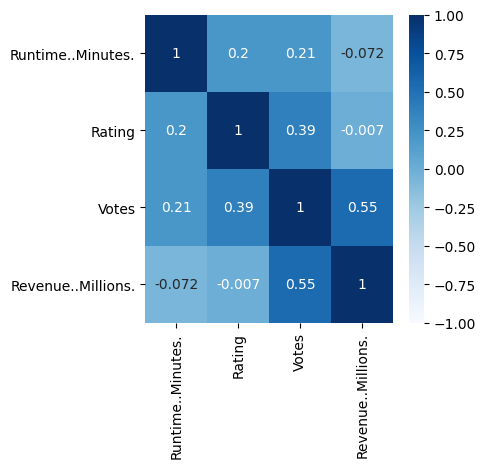

In [8]:
### Check the correlation matrix

fig, axs = plt.subplots(figsize=(4, 4))
sns.heatmap(final_data.corr(), annot=True, vmin=-1, vmax=1, cmap='Blues')
plt.show()

In [9]:
# Standardize the numeric features
scaler = StandardScaler()
X_std = scaler.fit_transform(final_data)
X_std

array([[ 0.79408371,  3.19501158,  3.12829373,  1.94549992],
       [ 0.60700634,  2.28491737,  2.60573733,  0.69817967],
       [ 1.21500778,  2.28491737, -1.2443777 , -0.75985093],
       [ 1.58916251,  1.37482316,  1.26133706,  0.15635307],
       [-1.35730599,  1.37482316, -1.28165567, -0.79337185],
       [-1.07668994,  1.37482316,  0.03258153, -0.74933355],
       [-0.2348418 ,  0.91977606,  0.92366775, -0.54261256],
       [ 0.74731437,  0.91977606,  0.98453578, -0.13181288],
       [ 1.3553158 ,  0.91977606,  1.70011775,  1.50413247],
       [-1.31053664,  0.91977606, -0.16984946, -0.74979984],
       [ 0.09254359,  0.91977606, -0.66953079, -0.7591774 ],
       [ 1.40208514,  0.91977606, -1.10958594, -0.81140165],
       [ 1.40208514,  0.46472896,  1.23968127,  0.02584426],
       [ 1.63593185,  0.46472896, -0.76816099, -0.78383886],
       [-1.73146072,  0.46472896,  0.58183386,  0.34193567],
       [-0.32838048,  0.00968185, -0.71825382, -0.03498041],
       [ 1.1214691 ,  0.

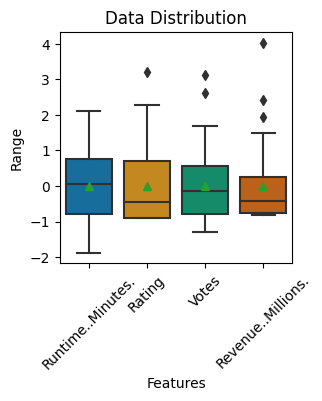

In [10]:
# Checking the distribution of scaled features

plt.rcParams['figure.figsize'] = [3,3]
sns.boxplot(data = X_std, orient="v", palette='colorblind', showmeans=True)
plt.title("Data Distribution", fontsize = 12)
plt.ylabel("Range")
plt.xlabel("Features")
_ = plt.xticks([0,1,2,3], final_data.columns, rotation=45)

In [11]:
# Using PCA from sklearn
pca = PCA(n_components=4)
principal_components = pca.fit_transform(X_std)




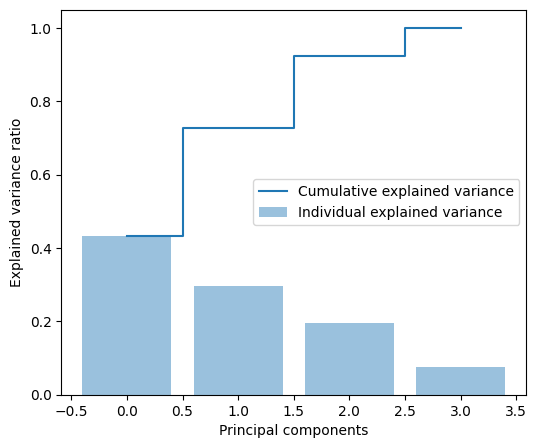

In [12]:
# Plot the explained variance
plt.figure(figsize=(6,5))
plt.bar(range(4), pca.explained_variance_ratio_, alpha = 0.45, align='center',label= "Individual explained variance")
plt.step(range(4), np.cumsum(pca.explained_variance_ratio_), where="mid", label = "Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc = "best")
# plt.title("Explained Variance of Principal Components")
plt.show()

In [13]:
# Print the individual and cumulative explained variance

var_exp  =pca.explained_variance_ratio_
print(var_exp)
print(np.cumsum(var_exp))

[0.43194996 0.29615718 0.19643312 0.07545974]
[0.43194996 0.72810714 0.92454026 1.        ]


In [14]:
# We choose three components as it explains 92.18% of the variance
# Create a new DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components[:, 0:3], columns=['PC1', 'PC2', 'PC3'])
principal_df

,PC1,PC2,PC3
0,4.772326,-0.462205,1.178936
1,3.335473,-0.733901,0.957936
2,0.107999,-2.447912,0.839995
3,1.999436,-1.405362,-0.235787
4,-1.044810,-0.428793,2.057119
5,-0.034166,-0.425854,1.845293
6,0.715607,-0.510149,0.896326
7,1.231255,-0.869504,0.114755
8,2.706205,-0.173282,-0.657259
9,-0.441114,-0.087897,1.704983


In [15]:
# Print eigen vectors
pca.components_


array([[ 0.27451942,  0.44409395,  0.69375761,  0.49610486],
       [-0.62740408, -0.47241293,  0.11582321,  0.60809138],
       [-0.70893809,  0.67414858, -0.00286349, -0.2071769 ],
       [ 0.16855263,  0.35373758, -0.7108285 ,  0.58410836]])

In [16]:
# Check how much each feature contributes towards the first PC 

def print_contributions(components, df):
    pc_comps = pd.DataFrame(zip(components, df.columns), columns=['weights', 'features'])
    pc_comps['abs_weights']=pc_comps['weights'].apply(lambda x: np.abs(x))
    print(pc_comps.sort_values('abs_weights', ascending=False))
    print("\n")


print_contributions(pca.components_[0], final_data)
print_contributions(pca.components_[1], final_data)
print_contributions(pca.components_[2], final_data)



    weights            features  abs_weights
2  0.693758               Votes     0.693758
3  0.496105  Revenue..Millions.     0.496105
1  0.444094              Rating     0.444094
0  0.274519   Runtime..Minutes.     0.274519


    weights            features  abs_weights
0 -0.627404   Runtime..Minutes.     0.627404
3  0.608091  Revenue..Millions.     0.608091
1 -0.472413              Rating     0.472413
2  0.115823               Votes     0.115823


    weights            features  abs_weights
0 -0.708938   Runtime..Minutes.     0.708938
1  0.674149              Rating     0.674149
3 -0.207177  Revenue..Millions.     0.207177
2 -0.002863               Votes     0.002863




In [17]:
# Check the above result with manual derivations as well

# Calculate eigenvectors and eigenvalues of the covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# List of  (eigenvalue, eigenvector)
pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# high to low
pairs.sort(key= lambda x : x[0], reverse=True)

# Explained vairance calculation
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp =np.cumsum(var_exp)

print("Eigen vectors :\n",eig_vecs, "\n")
print("Cumulative Variance explained :\n",cum_var_exp)

# We see that the PC loading vector is unique up to a sign change, this is seen in the values obtained from the derivation vs the PCA library.


Eigen vectors :
 [[-0.27451942 -0.62740408 -0.70893809 -0.16855263]
 [-0.44409395 -0.47241293  0.67414858 -0.35373758]
 [-0.69375761  0.11582321 -0.00286349  0.7108285 ]
 [-0.49610486  0.60809138 -0.2071769  -0.58410836]] 

Cumulative Variance explained :
 [ 43.19499589  72.8107142   92.45402613 100.        ]


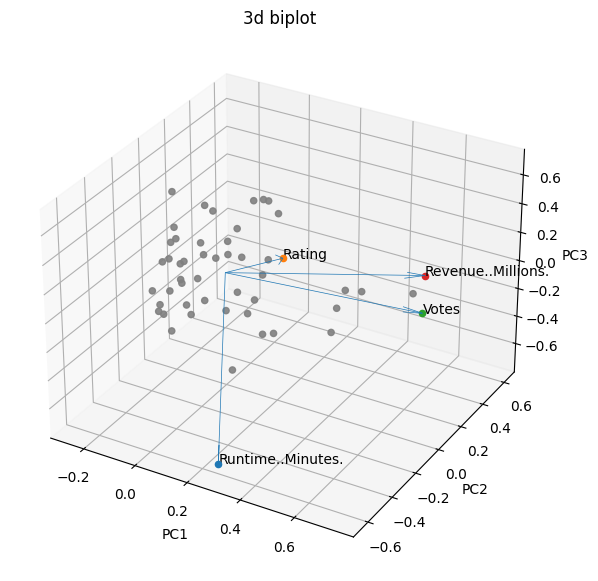

In [18]:
# 3D Biplot
plt.style.use('default')
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

# Plot the loadings
for i, featnames in enumerate(final_data.columns):
    ax.scatter3D(pca.components_[0, i], pca.components_[1, i], pca.components_[2, i])
    ax.text(pca.components_[0, i], pca.components_[1, i], pca.components_[2, i], featnames)

# Plot the arrows from origin to the loadings
x_arr = np.zeros(len(pca.components_[0]))
y_arr = z_arr = x_arr
ax.quiver(x_arr, y_arr, z_arr, pca.components_[0], pca.components_[1], pca.components_[2], arrow_length_ratio=0.1, linewidth=0.5)

# scaled pca
pca_df_scaled = principal_df.copy()
 
scaler_df = principal_df[['PC1', 'PC2', 'PC3']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

# Plot 3D scatterplot of PCA
ax.scatter3D(
    pca_df_scaled['PC1'], 
    pca_df_scaled['PC2'], 
    pca_df_scaled['PC3'],
    c='gray',
    alpha=0.9)

plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3d biplot")
plt.show()

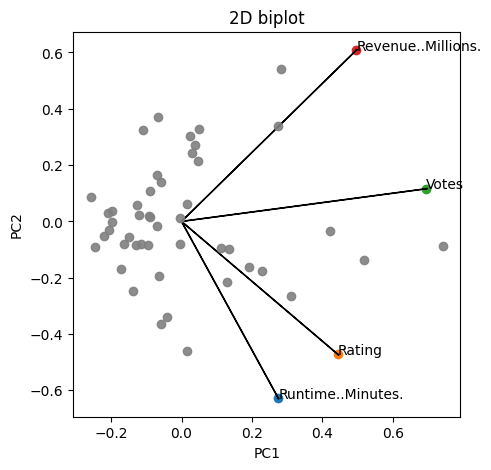

In [19]:
# 2D Biplot
plt.style.use('default')
fig= plt.figure(figsize=(5,5))
ax = plt.axes()

# Plot the loadings nd arrows
for i, featnames in enumerate(final_data.columns):
    ax.scatter(pca.components_[0, i], pca.components_[1, i])
    ax.text(pca.components_[0, i], pca.components_[1, i], featnames)
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i])

# scaled pca
pca_df_scaled = principal_df.copy()
 
scaler_df = principal_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

# Plot 3D scatterplot of PCA
ax.scatter(
    pca_df_scaled['PC1'], 
    pca_df_scaled['PC2'],  
    alpha=0.9,
    c='gray')

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.title("2D biplot")
plt.show()